In [8]:
import requests, networkx, time, collections

import matplotlib.pyplot as plt
%matplotlib inline

Get token from here https://vk.com/editapp?act=create

In [2]:
my_user_id = 307501797
version = '5.73' 
with open('token.txt') as f:
    token = f.read()

In [3]:
def get_friends_ids(user_id, token=token, version=version):
    url = 'https://api.vk.com/method/{method}?{parameters}&access_token={token}&v={version}'
    url = url.format(method='friends.get', parameters=f'user_ids={user_id}', token=token, version=version)
    response = requests.get(url).json()['response']['items']
    return response

In [4]:
graph = {}
friend_ids = get_friends_ids(my_user_id)

for ix, friend_id in enumerate(friend_ids):
    print(f'Processing id {ix+1}/{len(friend_ids)}')
    graph[friend_id] = get_friends_ids(friend_id)
    time.sleep(1)

Processing id 1/39
Processing id 2/39
Processing id 3/39
Processing id 4/39
Processing id 5/39
Processing id 6/39
Processing id 7/39
Processing id 8/39
Processing id 9/39
Processing id 10/39
Processing id 11/39
Processing id 12/39
Processing id 13/39
Processing id 14/39
Processing id 15/39
Processing id 16/39
Processing id 17/39
Processing id 18/39
Processing id 19/39
Processing id 20/39
Processing id 21/39
Processing id 22/39
Processing id 23/39
Processing id 24/39
Processing id 25/39
Processing id 26/39
Processing id 27/39
Processing id 28/39
Processing id 29/39
Processing id 30/39
Processing id 31/39
Processing id 32/39
Processing id 33/39
Processing id 34/39
Processing id 35/39
Processing id 36/39
Processing id 37/39
Processing id 38/39
Processing id 39/39


In [86]:
g = networkx.Graph(directed=False)
for i in graph:
    g.add_node(i)
    for j in graph[i]:
        if i != j and i in friend_ids and j in friend_ids:
            g.add_edge(i, j)

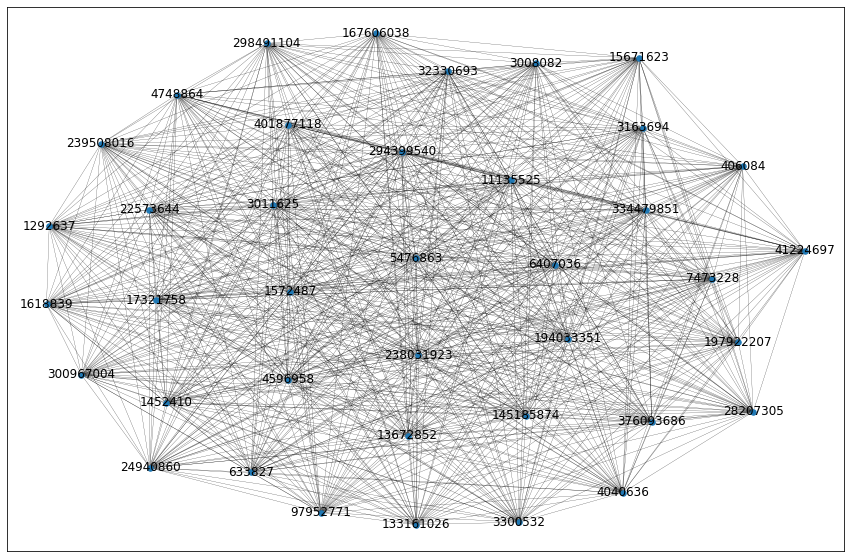

In [28]:
plt.figure(figsize=(15, 10))
networkx.draw_networkx(g, node_size=30, width=0.2)